Sberbank Russian Housing Market

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv("train.csv")
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [35]:
df.shape[0]

30471

In [36]:
df.price_doc.values

array([ 5850000,  6000000,  5700000, ...,  6970959, 13500000,  5600000])

***Distribution of price***

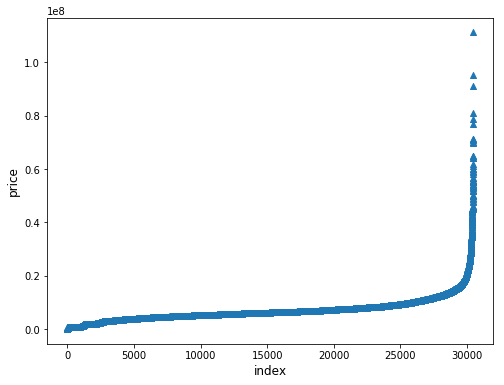

In [135]:
#price are equally distributed
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.price_doc.values),marker="^")
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()


Text(0.5, 0, 'prices')

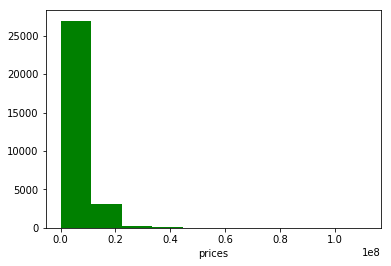

In [99]:

plt.hist(df.price_doc.values,color='green')
plt.xlabel("prices")

Text(0.5, 0, 'prices')

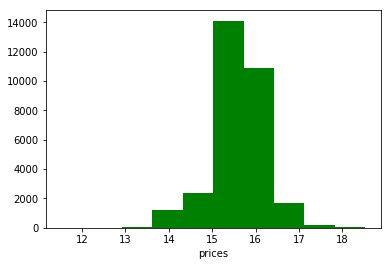

In [98]:
#Root Mean Square Logarithmic error
plt.hist(np.log(df.price_doc.values),color='green') 
plt.xlabel("prices")

In [0]:
import seaborn as sns

***Relation between product type and prices***

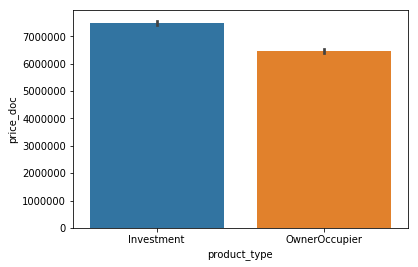

In [59]:
sns.barplot(x='product_type',y='price_doc',data=df)

***Hike of prices according to month and year***

In [0]:
df['yearmonth'] = df['timestamp'].apply(lambda x: x[:4]+x[5:7])
grouped_df = df.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()


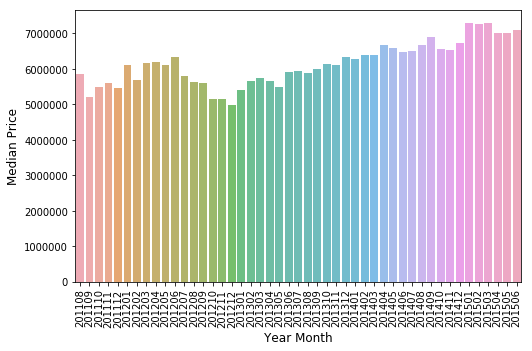

In [127]:
plt.figure(figsize=(8,5))
sns.barplot(grouped_df.yearmonth.values, grouped_df.price_doc.values, alpha=0.8)
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

***floor v/s price***

[Text(0, 0.5, 'Price Doc'),
 Text(0.5, 0, 'Floor'),
 Text(0.5, 1.0, 'Floor Vs Price Doc')]

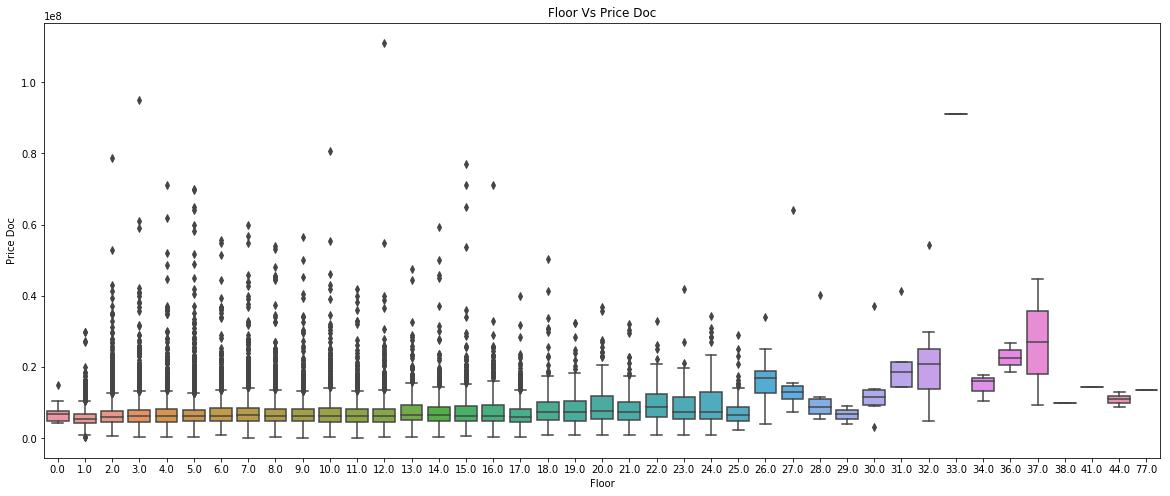

In [88]:
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
sn.boxplot(x="floor", y="price_doc", data=df,ax=ax)
ax.set(ylabel='Price Doc',xlabel="Floor",title="Floor Vs Price Doc")

***Relationship between area and price***

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


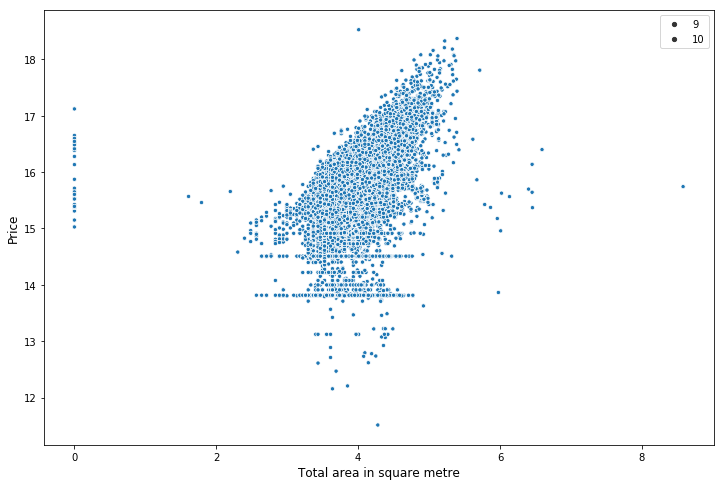

In [125]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=np.log(df.full_sq.values), y=np.log(df.price_doc.values), size=10)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Total area in square metre', fontsize=12)
plt.show()

***count of buidings wrt no. of floor***

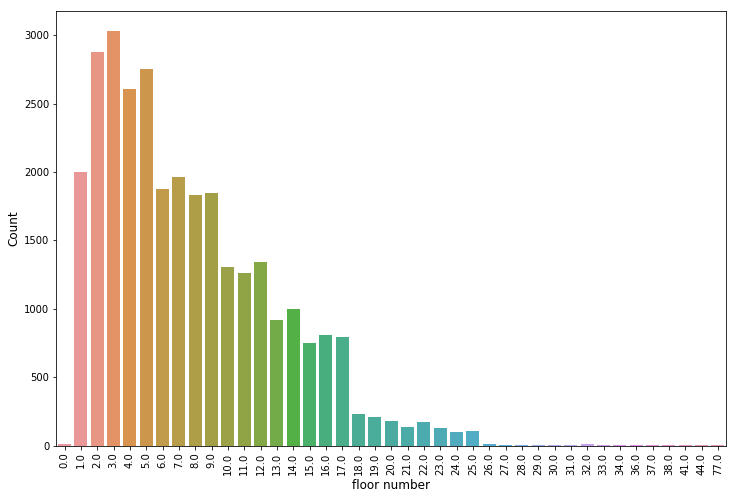

In [81]:
plt.figure(figsize=(12,8))
sns.countplot(x="floor", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('floor number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

***price wrt ecological conditions***

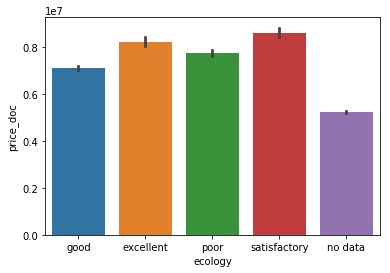

In [90]:
sns.barplot(x='ecology',y='price_doc',data=df)

***population v/s price***

Text(0, 0.5, 'Prices')

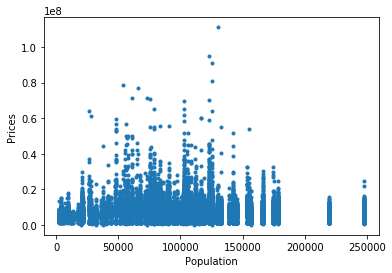

In [133]:
plt.scatter(df["raion_popul"],df["price_doc"],marker=".")
plt.xlabel("Population")
plt.ylabel("Prices")

***Construction of buildings wrt to year***

[Text(0.5, 1.0, 'Distribution of build year')]

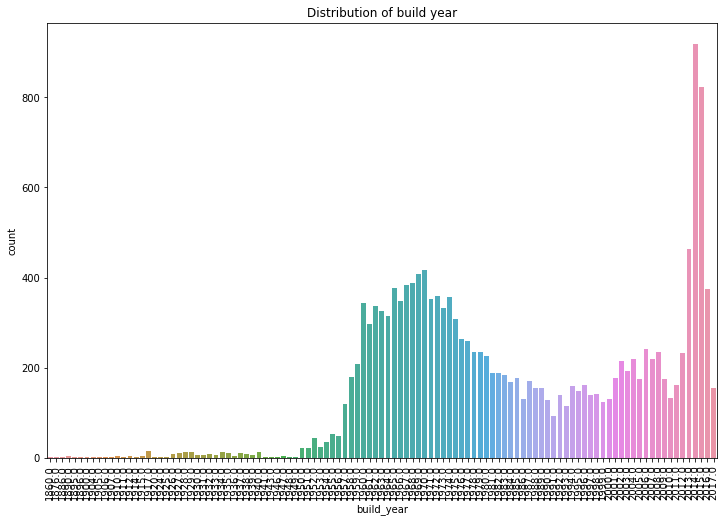

In [108]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
ind = df[(df['build_year'] <= 1691) | (df['build_year'] >= 2018)].index
by_df = df.drop(ind).sort_values(by=['build_year'])
sns.countplot(x=by_df['build_year'])
ax.set(title='Distribution of build year')

***build year wrt prices***
regression plot

[Text(0.5, 1.0, 'Mean price by year of build')]

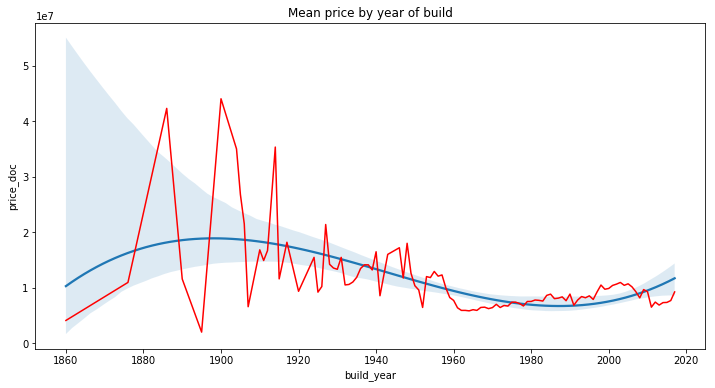

In [109]:
f, ax = plt.subplots(figsize=(12, 6))
by_price = by_df.groupby('build_year')[['build_year', 'price_doc']].mean()
sns.regplot(x="build_year", y="price_doc", data=by_price, scatter=False, order=3, truncate=True)
plt.plot(by_price['build_year'], by_price['price_doc'], color='r')
ax.set(title='Mean price by year of build')


***correalation between different parameters wrt prices***

In [0]:
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']
corrmat = df[internal_chars].corr()

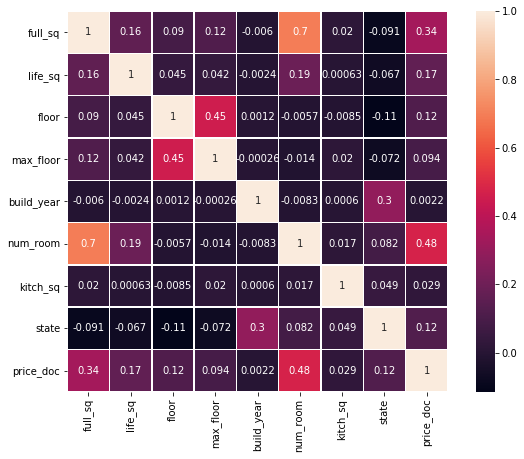

In [130]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)